In [1]:
# # 시각화할 때 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumBarunGothic'
# import matplotlib as mlp
# mlp.rcParams["axes.unicode_minus"] = False

from google.colab import drive
import glob

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#### data load

In [ ]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

# data 경로 저장
data_path = "/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_csv(data_path+'preprocessing_info_4year.csv')
# df.drop('card_name', axis=1, inplace=True)
df.rename(columns={'rank_x':'rank', 'rank_y':'rank_min'}, inplace=True)
df.head()

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank,chart_in,rank_min,count
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,1,0,0,0,0,1,100.0,1,100,1
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100,1
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,0,0,0,0,0,100.0,1,100,1
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,0,0,0,0,0,99.0,1,99,2
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,1,98.5,1,97,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_company       923 non-null    object 
 1   card_name          923 non-null    object 
 2   fee                923 non-null    int64  
 3   perform            923 non-null    int64  
 4   brand              887 non-null    object 
 5   point              923 non-null    int64  
 6   convenience_store  923 non-null    int64  
 7   cafe               923 non-null    int64  
 8   food_delivery      923 non-null    int64  
 9   medical            923 non-null    int64  
 10  edu                923 non-null    int64  
 11  life_finance       923 non-null    int64  
 12  online             923 non-null    int64  
 13  shopping           923 non-null    int64  
 14  transportation     923 non-null    int64  
 15  travel             923 non-null    int64  
 16  streaming          923 non

In [ ]:
df.describe()

,fee,perform,point,convenience_store,cafe,food_delivery,medical,edu,life_finance,online,...,travel,streaming,beauty,sprots,enter,franchisee,rank,chart_in,rank_min,count
count,9.230000e+02,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,6.235146e+04,25.178765,0.490791,0.23727,0.344529,0.154930,0.076923,0.075840,0.258938,0.228602,...,0.208017,0.094258,0.056338,0.074756,0.252438,0.391116,20.853434,0.331528,14.638137,5.589382
std,2.159483e+05,22.696371,0.500186,0.42564,0.475472,0.362034,0.266614,0.264885,0.438289,0.420160,...,0.406109,0.292346,0.230698,0.263140,0.434647,0.488265,32.554402,0.471017,26.699727,12.706489
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+04,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000e+04,40.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,47.327381,1.000000,18.000000,4.000000
max,2.500000e+06,150.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,100.000000,62.000000


In [ ]:
df[df['fee']<500000]

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank,chart_in,rank_min,count
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100,1
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,0,0,0,0,0,100.0,1,100,1
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,0,0,0,0,0,99.0,1,99,2
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,1,98.5,1,97,2
5,신한카드,신한카드 Deep Once,23000,40,Mastercard,1,0,0,0,0,...,0,1,0,0,0,0,98.0,1,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,제주은행,국민행복카드,0,0,NaN,1,0,1,0,1,...,0,0,0,0,0,0,0.0,0,0,0
919,우리카드,다둥이 행복카드,0,0,VISA,1,0,0,0,0,...,0,0,0,0,1,0,0.0,0,0,0
920,우리카드,국민행복카드 S2,0,30,BC Mastercard,0,0,0,0,1,...,0,0,0,0,0,1,0.0,0,0,0
921,삼성카드,삼성 iD POCKET 카드,0,0,NaN,0,1,1,1,0,...,0,0,0,0,0,0,0.0,0,0,0


In [ ]:
col_list = ['convenience_store', 'cafe', 'food_delivery', 'medical', 'edu', 'life_finance', 'online',
            'shopping','transportation', 'travel', 'streaming', 'beauty', 'sprots', 'enter','franchisee']

df['sum'] = 0
for col in col_list:
  df['sum'] = df['sum']+df[col]

df.drop(df[(df['chart_in']==0)&(df['sum']>=6)].index, inplace=True)
df.drop(df[(df['chart_in']==1)&(df['sum']<=1)].index, inplace=True)
df = df[df['fee']<500000].reset_index(drop=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col_list = ['fee', 'perform', 'count']

scaler = MinMaxScaler()
scaler.fit(df[col_list])
scale_fit = scaler.transform(df[col_list])

df[['fee_scale', 'perform_scale', 'count_scale']] = scale_fit

In [ ]:
col_list = [
            # 'point',
            'convenience_store', 'cafe',
            'food_delivery',
            'medical', 'edu',
            'life_finance',
            'online', 'shopping',
            'transportation',
            'travel',
            'streaming', 'beauty', 'sprots', 'enter',
            'franchisee',
            # 'chart_in'
            ]
df.columns

Index(['card_company', 'card_name', 'fee', 'perform', 'brand', 'point',
       'convenience_store', 'cafe', 'food_delivery', 'medical', 'edu',
       'life_finance', 'online', 'shopping', 'transportation', 'travel',
       'streaming', 'beauty', 'sprots', 'enter', 'franchisee', 'rank',
       'chart_in', 'rank_min', 'count', 'sum', 'fee_scale', 'perform_scale',
       'count_scale'],
      dtype='object')

# 클러스터링

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_df = df[col_list]
k_df.head(2)

,convenience_store,cafe,food_delivery,medical,edu,life_finance,online,shopping,transportation,travel,streaming,beauty,sprots,enter,franchisee
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


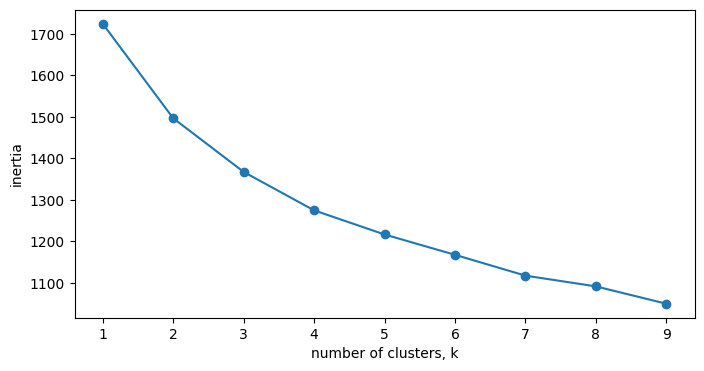

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(k_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(8, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 2 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(k_df) # unsupervised learning

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(k_df) # 각 예측군집

print(pred[:10])
pd.DataFrame(centers)

[1 1 0 0 1 0 0 0 1 0]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.359102,0.591022,0.231920,0.097257,0.087282,0.339152,0.289277,0.199501,0.790524,0.154613,0.104738,0.052369,0.064838,0.369077,0.216958
1,0.070886,0.086076,0.058228,0.037975,0.037975,0.156962,0.167089,0.129114,0.070886,0.258228,0.088608,0.035443,0.070886,0.118987,0.572152


In [ ]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = k_df.copy()
clust_df['clust'] = pred
clust_df.head()

,convenience_store,cafe,food_delivery,medical,edu,life_finance,online,shopping,transportation,travel,streaming,beauty,sprots,enter,franchisee,clust
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


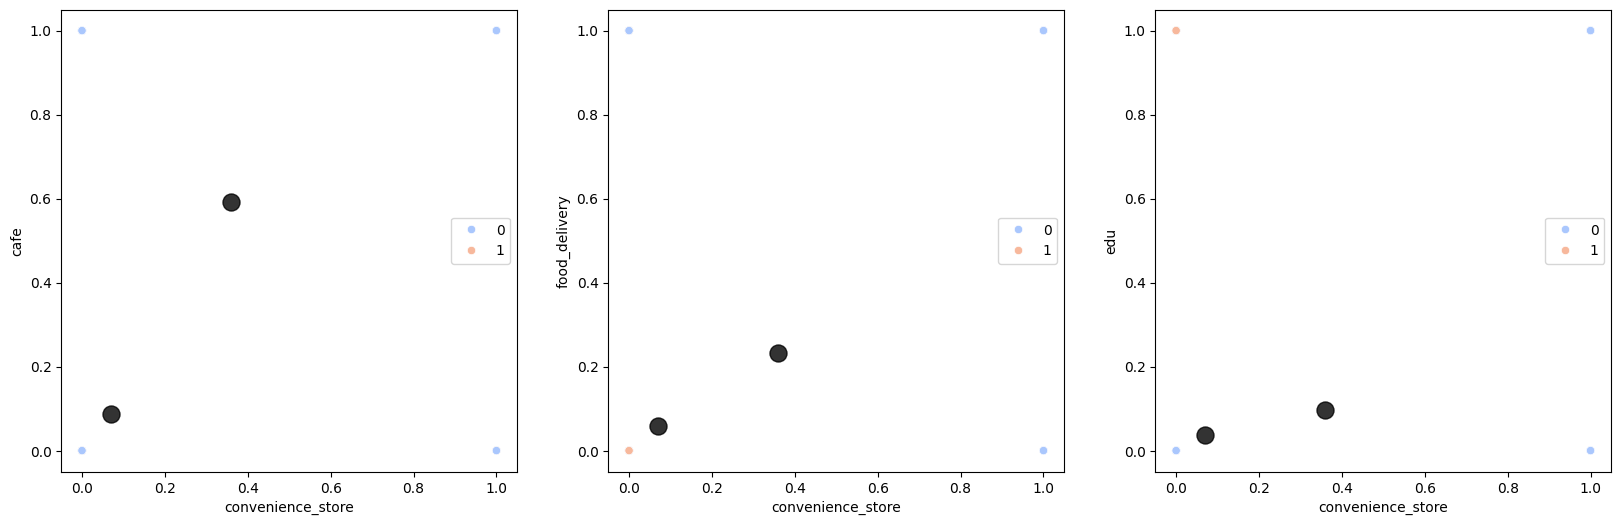

In [ ]:
plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,4], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

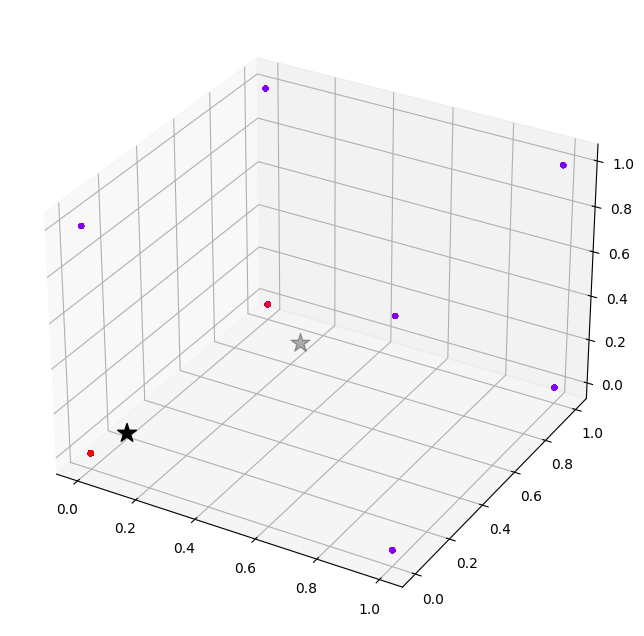

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
plt.show()

In [ ]:
# 2차원 평면에 그리기 위해 PCA로 2개로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(clust_df)

clust_df['pca_x'] = pca_transformed[:,0]
clust_df['pca_y'] = pca_transformed[:,1]

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = clust_df[clust_df['clust']==0].index
marker1_ind = clust_df[clust_df['clust']==1].index
# marker2_ind = clust_df[clust_df['clust']==2].index
# marker3_ind = clust_df[clust_df['clust']==3].index

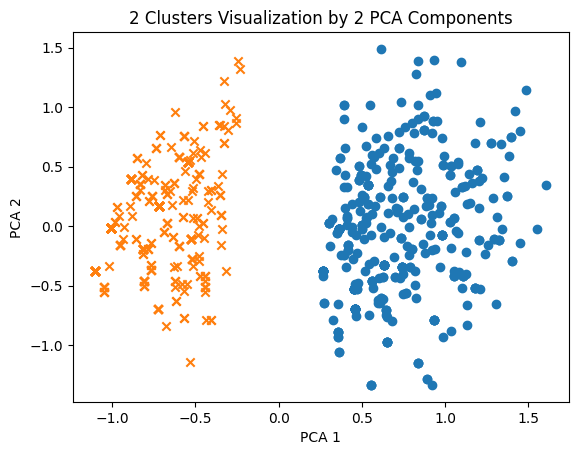

In [ ]:
plt.scatter(x=clust_df.loc[marker0_ind,'pca_x'], y=clust_df.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=clust_df.loc[marker1_ind,'pca_x'], y=clust_df.loc[marker1_ind,'pca_y'], marker='x')
# plt.scatter(x=clust_df.loc[marker2_ind,'pca_x'], y=clust_df.loc[marker2_ind,'pca_y'], marker='s')
# plt.scatter(x=clust_df.loc[marker3_ind,'pca_x'], y=clust_df.loc[marker3_ind,'pca_y'], marker='s')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.show()

In [ ]:
df['cluster'] = clust_df['clust']

<Axes: xlabel='cluster', ylabel='count'>

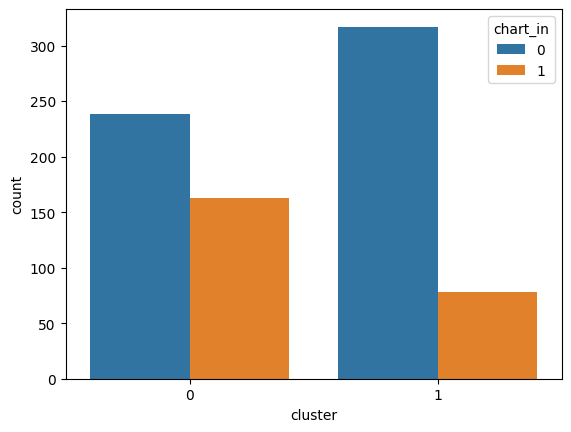

In [ ]:
sns.countplot(data=df, x='cluster', hue='chart_in')

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(k_df)

clust_df['pca_xx'] = pca_transformed[:,0]
clust_df['pca_yy'] = pca_transformed[:,1]

In [ ]:
df['cluster'] = clust_df['clust']
df['pca_x'] = clust_df['pca_x']
df['pca_y'] = clust_df['pca_y']
df['pca_xx'] = clust_df['pca_xx']
df['pca_yy'] = clust_df['pca_yy']

In [ ]:
clust_df

,convenience_store,cafe,food_delivery,medical,edu,life_finance,online,shopping,transportation,travel,streaming,beauty,sprots,enter,franchisee,clust,pca_x,pca_y,pca_xx,pca_yy
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,-0.727318,-0.698217,-0.578447,-0.442035
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,-0.809050,-0.458998,-0.641783,-0.300141
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.858064,0.063750,0.670124,0.186418
3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1.100667,0.332366,1.005988,0.359706
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,-0.483688,-0.075786,-0.221187,0.159265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.308511,-0.165063,0.027401,-0.309639
919,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0.904640,0.174271,0.778887,0.048721
920,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,-0.620797,0.957919,-0.307617,1.052467
921,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1.130151,0.187944,1.031044,0.110913


# 1) 데이터 준비

## (1) 상관성 확인

In [ ]:
col = df.describe().columns.tolist()
col

['index',
 'fee',
 'perform',
 'point',
 'convenience_store',
 'cafe',
 'food_delivery',
 'medical',
 'edu',
 'life_finance',
 'online',
 'shopping',
 'transportation',
 'travel',
 'streaming',
 'beauty',
 'sprots',
 'enter',
 'franchisee',
 'rank',
 'chart_in',
 'rank_min',
 'count',
 'sum',
 'fee_scale',
 'perform_scale',
 'count_scale']

In [ ]:
col = ['point', 'convenience_store', 'cafe', 'food_delivery', 'medical', 'edu', 'life_finance', 'online', 'shopping',
      'transportation', 'travel', 'streaming', 'beauty', 'sprots', 'enter',
      'franchisee', 'fee_scale', 'perform_scale', 'cluster', 'rank',
      #  'count_scale', 'chart_in'
       ]

<Axes: >

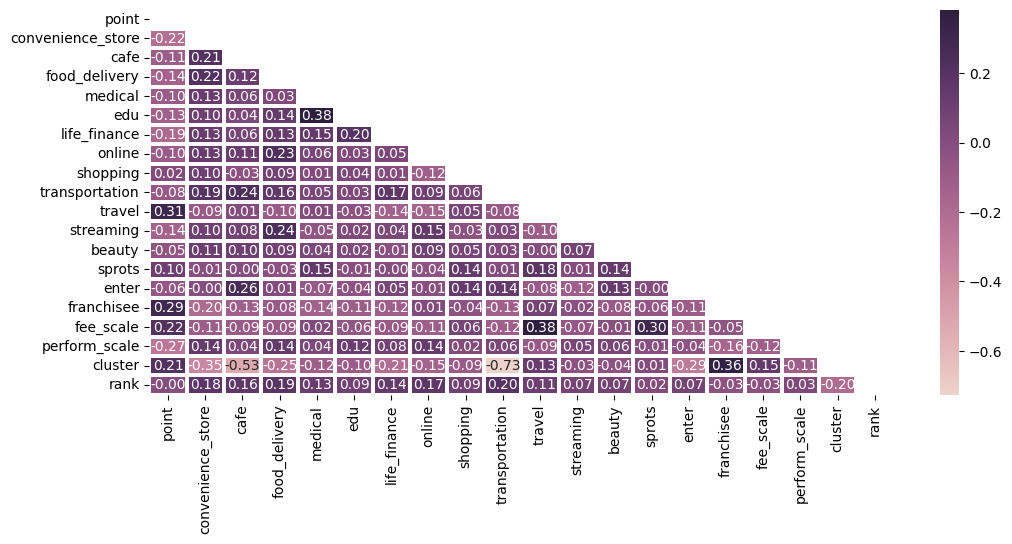

In [ ]:
df_matrix = df[col]
# df_matrix['rank'] = df['rank']
# df_matrix['chart_in'] = df['chart_in']

df_corr = df_matrix.corr()
df_corr = df_matrix.corr()

plt.figure(figsize=(12, 5))

mask=np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),
            linewidths=1.5, linecolor='White',
            fmt=".2f", mask=mask)

# 2) 모델 학습

## (1) 선형모델

### (1-1) 다중선형회귀모델 -> rank

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
df0 = df[df['chart_in']==1]

In [ ]:
set_col = [
            'point',
            'convenience_store', 'cafe',
            'food_delivery',
            'medical', 'edu', 'life_finance', 'online', 'shopping',
            'transportation', 'travel', 'streaming', 'beauty', 'sprots', 'enter',
            'franchisee',
            'fee_scale',
            'perform_scale',
            ]

<Axes: >

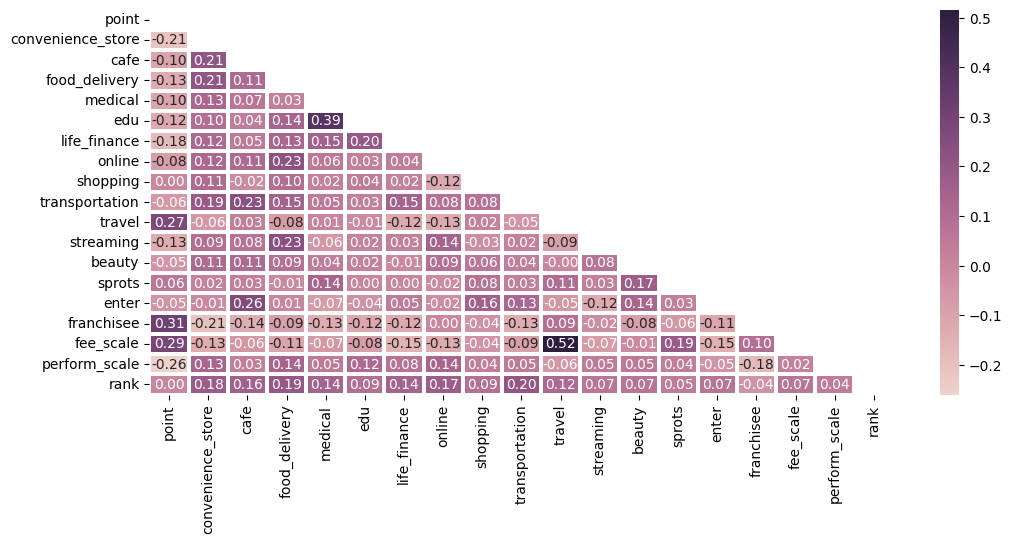

In [ ]:
df_matrix = df[set_col]
df_matrix['rank'] = df['rank']
# df_matrix['rank_min'] = df['rank_min']
# df_matrix['chart_in'] = df['chart_in']

df_corr = df_matrix.corr()
df_corr = df_matrix.corr()

plt.figure(figsize=(12, 5))

mask=np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),
            linewidths=1.5, linecolor='White',
            fmt=".2f", mask=mask)

#### Chart_in

In [ ]:
set_col = [
            # 'point',
            'convenience_store', 'cafe',
            'food_delivery',
            'medical', 'edu',
            'life_finance',
            'online', 'shopping',
            'transportation',
            'travel',
            'streaming',
            # 'beauty',
            'sprots',
            'enter',
            'franchisee',
            'fee_scale',
            'perform_scale',
            ]

In [ ]:
from sklearn.model_selection import train_test_split

X = df[set_col]
y = df['chart_in']
# X = df0[set_col]
# y = df0['rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((615, 16), (154, 16), (615,), (154,))

In [ ]:
# for b0, 상수항 추가
# X_train = df0[col]
# X_train = sm.add_constant(X_train, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y_train, X_train)
# multi_model = sm.OLS(y, X)
fitted_multi_model = multi_model.fit(cov_type='HC0', random_state=42)
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               chart_in   R-squared (uncentered):                   0.453
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              29.27
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                    1.09e-64
Time:                        04:41:44   Log-Likelihood:                         -315.89
No. Observations:                 615   AIC:                                      663.8
Df Residuals:                     599   BIC:                                      734.5
Df Model:                          16                                                  
Covariance Type:                  HC0                                                  
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
convenience_store     0.1317      0.046      2.878      0.004       0.042       0.221
cafe                  0.0527      0.042      1.268      0.205      -0.029       0.134
food_delivery         0.1449      0.055      2.645      0.008       0.038       0.252
medical               0.1711      0.076      2.257      0.024       0.023       0.320
edu                   0.0972      0.073      1.338      0.181      -0.045       0.240
life_finance          0.1092      0.040      2.725      0.006       0.031       0.188
online                0.1484      0.045      3.317      0.001       0.061       0.236
shopping              0.0605      0.047      1.275      0.202      -0.033       0.153
transportation        0.1550      0.036      4.353      0.000       0.085       0.225
travel                0.2104      0.052      4.015      0.000       0.108       0.313
streaming             0.1015      0.065      1.569      0.117      -0.025       0.228
sprots               -0.1237      0.063     -1.958      0.050      -0.247       0.000
enter                 0.0620      0.042      1.471      0.141      -0.021       0.145
franchisee            0.0490      0.030      1.622      0.105      -0.010       0.108
fee_scale             0.2631      0.142      1.849      0.064      -0.016       0.542
perform_scale        -0.1671      0.103     -1.625      0.104      -0.369       0.034
==============================================================================
Omnibus:                       75.157   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.884
Skew:                           0.704   Prob(JB):                     1.34e-14
Kurtosis:                       2.287   Cond. No.                         8.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
"""

Text(0.5, 0, 'threshold')

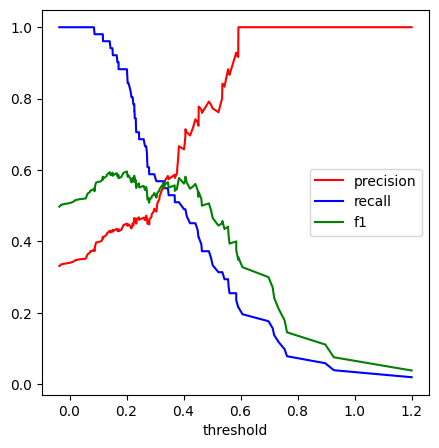

In [ ]:
y_val_prob1 = fitted_multi_model.predict(X_test)
thresholds_1 = np.unique(y_val_prob1)
precisions_1 = []
recalls_1 = []
f1s_1 = []

for t in thresholds_1:
    y_val_pred = (y_val_prob1 >= t)
    precisions_1.append(precision_score(y_test, y_val_pred))
    recalls_1.append(recall_score(y_test, y_val_pred))
    f1s_1.append(f1_score(y_test, y_val_pred))

plt.figure(figsize=(5,5))
plt.plot(thresholds_1, precisions_1, c='r', label="precision")
plt.plot(thresholds_1, recalls_1, c='b', label="recall")
plt.plot(thresholds_1, f1s_1, c='g', label="f1")

plt.legend(loc="center right", fontsize=10)
plt.xlabel("threshold", fontsize=10)

In [ ]:
# 정밀도와 재현율이 같아지는 임곗값

pr_eq_t = np.argmax(np.array(precisions_1)- np.array(recalls_1)==0)
print(thresholds_1[pr_eq_t])
print(precisions_1[pr_eq_t])
print(recalls_1[pr_eq_t])

0.3305571916615919
0.5490196078431373
0.5490196078431373


In [ ]:
def my_confusion_matrix1(y_true, y_pred):
    tn = ((y_true==0) & (y_pred==0)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    tp = ((y_true==1) & (y_pred==1)).sum()
    return np.array([[tn, fp],[fn,tp]])

# y의 레이블 종류가 2개가 아닌 경우도 아래 코드를 조금만 수정하면 됨
def my_confusion_matrix2(y_true, y_pred):
    cf_mat = np.zeros((2,2), dtype=int)
    for i in range(2):
        for j in range(2):
            cf_mat[i,j] = ((y_true == i) & (y_pred == j)).sum()
    return cf_mat

y_val_pred = (fitted_multi_model.predict(X_test) > thresholds_1[pr_eq_t])
my_confusion_matrix1(y_test, y_val_pred)

array([[81, 22],
       [23, 28]])

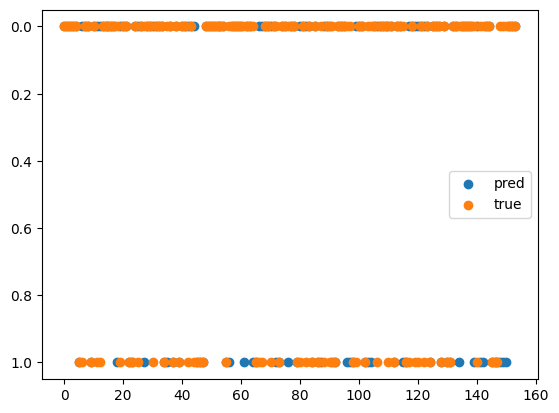

In [ ]:
idx = list(range(0, 154))
plt.scatter(idx, y_val_pred,label = "pred")
plt.scatter(x=idx, y=np.array(y_test),label = "true")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

#### Rank

In [ ]:
set_col = ['point',
            'convenience_store', 'cafe',
            # 'food_delivery',
            'medical', 'edu',
            # 'life_finance',
            'online', 'shopping',
            'transportation',
            # 'travel',
            # 'streaming',
            'beauty',
            'sprots',
            'enter',
            'franchisee',
            'fee_scale',
            'perform_scale',
            ]

In [ ]:
X = df0[set_col]
y = df0['rank']
# X = df[set_col]
# y = df['chart_in']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((188, 14), (47, 14), (188,), (47,))

In [ ]:
# X_train = sm.add_constant(X_train, has_constant = "add")

# OLS 검정
# multi_model = sm.OLS(y, X)
multi_model = sm.OLS(y_train, X_train)
# multi_model = sm.OLS(y, X)
# fitted_multi_model2 = multi_model.fit()
fitted_multi_model2 = multi_model.fit(cov_type='HC0', random_state=42)
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rank   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              78.89
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                    1.42e-67
Time:                        06:33:00   Log-Likelihood:                         -902.40
No. Observations:                 188   AIC:                                      1833.
Df Residuals:                     174   BIC:                                      1878.
Df Model:                          14                                                  
Covariance Type:                  HC0                                                  
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
point                21.9248      4.711      4.654      0.000      12.692      31.158
convenience_store    10.3690      4.881      2.125      0.034       0.803      19.935
cafe                  8.4232      4.325      1.948      0.051      -0.054      16.900
medical              19.3836      6.566      2.952      0.003       6.514      32.253
edu                  -8.1530      8.550     -0.954      0.340     -24.911       8.605
online               12.7830      5.159      2.478      0.013       2.671      22.895
shopping             20.0468      5.060      3.962      0.000      10.129      29.964
transportation        8.8031      4.605      1.912      0.056      -0.222      17.828
beauty              -11.7903      8.456     -1.394      0.163     -28.365       4.784
sprots               -7.5144      6.865     -1.095      0.274     -20.970       5.942
enter                11.0953      4.805      2.309      0.021       1.677      20.514
franchisee            8.0315      5.022      1.599      0.110      -1.811      17.874
fee_scale            28.3231     12.025      2.355      0.019       4.755      51.891
perform_scale        89.4689     16.128      5.547      0.000      57.859     121.079
==============================================================================
Omnibus:                        3.014   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.467
Skew:                          -0.161   Prob(JB):                        0.291
Kurtosis:                       2.540   Cond. No.                         9.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
"""

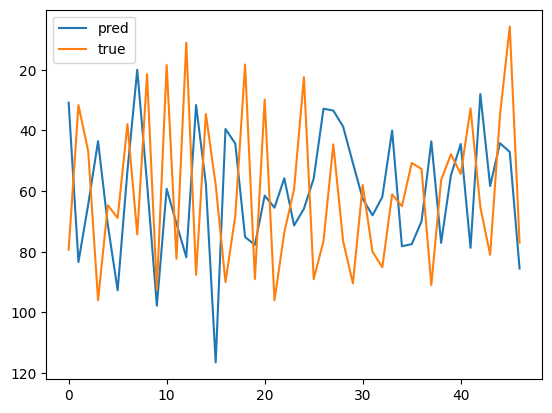

In [ ]:
 # plt.plot(np.array(fitted_multi_model2.predict(df[df['chart_in']==0][set_col])),label = "pred")
plt.plot(np.array(fitted_multi_model2.predict(X_test)),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, fitted_multi_model2.predict(X_test))
print('RMSE:', np.sqrt(mse))
# RMSE: 26.452342664408157

RMSE: 34.22930668213996


<Axes: >

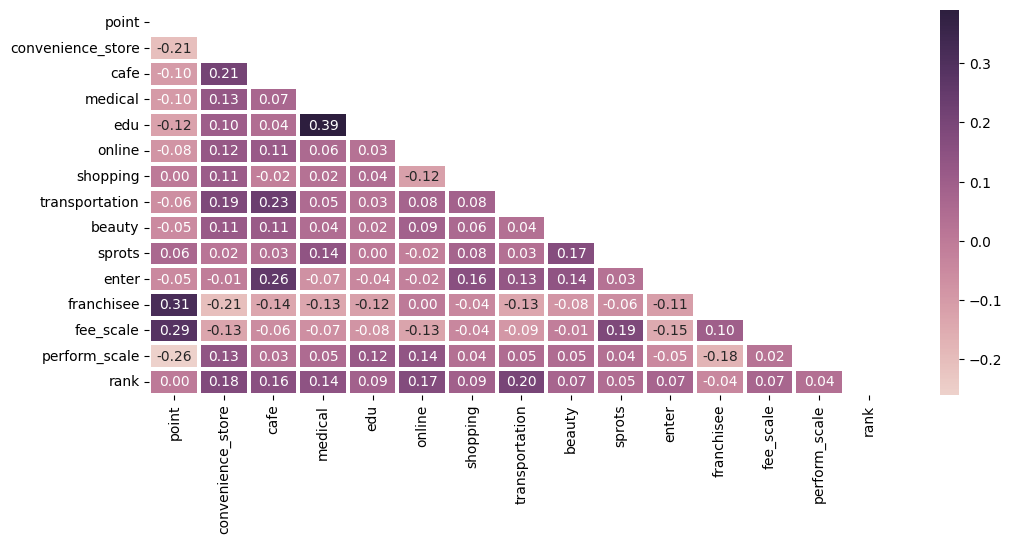

In [ ]:
df_matrix = df[set_col]
df_matrix['rank'] = df['rank']

df_corr = df_matrix.corr()
df_corr = df_matrix.corr()

plt.figure(figsize=(12, 5))

mask=np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),
            linewidths=1.5, linecolor='White',
            fmt=".2f", mask=mask)

In [ ]:
df0[set_col].describe()

,point,convenience_store,cafe,medical,edu,online,shopping,transportation,beauty,sprots,enter,franchisee,fee_scale,perform_scale
count,235.00000,235.000000,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.47234,0.353191,0.47234,0.119149,0.110638,0.378723,0.200000,0.634043,0.072340,0.072340,0.302128,0.395745,0.112208,0.183546
std,0.50030,0.478982,0.50030,0.324655,0.314353,0.486104,0.400854,0.482726,0.259604,0.259604,0.460160,0.490054,0.195386,0.134128
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000
50%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.200000
75%,1.00000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.060606,0.266667
max,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y.describe()

count    235.000000
mean      63.214719
std       23.153007
min        1.000000
25%       47.967213
50%       66.354839
75%       81.363636
max      100.000000
Name: rank, dtype: float64

## (2) 분류모델 -> chart in/out

In [ ]:
df_ = pd.read_csv(data_path+'preprocessing_info_4year.csv')
df_.rename(columns={'rank_x':'rank', 'rank_y':'rank_min'}, inplace=True)

In [ ]:
df_ = df_[(df_['perform']<75)&(df_['fee']<100000)]
df_ = df_[(df_['card_company']!='차이')]
df_ = df_[(df_['card_company']!='케이뱅크')]
df_ = df_[(df_['card_company']!='BNK경남은행')]
df_ = df_[(df_['card_company']!='SC제일은행')]
df_ = df_[(df_['card_company']!='Sh수협은행')]
df_ = df_[(df_['card_company']!='SSGPAY. CARD')]
df_.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col_list = ['fee', 'perform', 'count']

scaler = MinMaxScaler()
scaler.fit(df_[col_list])
scale_fit = scaler.transform(df_[col_list])

df_[['fee_scale', 'perform_scale', 'count_scale']] = scale_fit

In [ ]:
col_list = ['convenience_store', 'cafe', 'food_delivery', 'medical', 'edu', 'life_finance', 'online',
            'shopping','transportation', 'travel', 'streaming', 'beauty', 'sprots', 'enter','franchisee']

df_['sum'] = 0
for col in col_list:
  df_['sum'] = df_['sum']+df_[col]

df_.drop(df_[(df_['chart_in']==0)&(df_['sum']>=6)].index, inplace=True)
df_.drop(df_[(df_['chart_in']==1)&(df_['sum']<=1)].index, inplace=True)

In [ ]:
df_encoded = pd.get_dummies(df_[['card_company']])
df_encoded

,card_company_BC 바로카드,card_company_BNK부산은행,card_company_DGB대구은행,card_company_IBK기업은행,card_company_KB국민카드,card_company_NH농협카드,card_company_광주은행,card_company_롯데카드,card_company_삼성카드,card_company_신한카드,card_company_신협,card_company_씨티카드,card_company_우리카드,card_company_전북은행,card_company_제주은행,card_company_하나카드,card_company_현대백화점,card_company_현대카드
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
793,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
794,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
795,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_[['BC', 'IBK', 'KB', 'NH', 'lotte', 'Samsung', 'Shinhan',
    'WE', 'HANA', 'HD']] = df_encoded[['card_company_BC 바로카드', 'card_company_IBK기업은행',
                                       'card_company_KB국민카드', 'card_company_NH농협카드',
                                       'card_company_롯데카드', 'card_company_삼성카드', 'card_company_신한카드',
                                       'card_company_우리카드', 'card_company_하나카드', 'card_company_현대카드']]

In [ ]:
df_.head()

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,BC,IBK,KB,NH,lotte,Samsung,Shinhan,WE,HANA,HD
0,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
2,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,False,False,False,False,False,True,False,False,False,False
3,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,False,False,True,False,False,False,False,False,False,False
5,KB국민카드,Easy pick카드,20000,50,Mastercard JCB,1,1,0,1,0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 796
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_company       684 non-null    object 
 1   card_name          684 non-null    object 
 2   fee                684 non-null    int64  
 3   perform            684 non-null    int64  
 4   brand              656 non-null    object 
 5   point              684 non-null    int64  
 6   convenience_store  684 non-null    int64  
 7   cafe               684 non-null    int64  
 8   food_delivery      684 non-null    int64  
 9   medical            684 non-null    int64  
 10  edu                684 non-null    int64  
 11  life_finance       684 non-null    int64  
 12  online             684 non-null    int64  
 13  shopping           684 non-null    int64  
 14  transportation     684 non-null    int64  
 15  travel             684 non-null    int64  
 16  streaming          684 non-null

In [ ]:
set_col = ['fee_scale',
          #  'perform_scale',
          #  'point',
           'convenience_store',
          #  'cafe',
           'food_delivery',
           'medical',
           'edu',
           'life_finance',
           'online',
          #  'shopping',
           'transportation',
           'travel',
           'streaming',
          #  'beauty',
          #  'sprots',
          #  'enter',
           'franchisee',
           'lotte', 'Samsung', 'Shinhan',
           'WE', 'HANA', 'HD'
           ]

In [ ]:
from sklearn.model_selection import train_test_split

X = df_[set_col]
y = df_['chart_in']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((547, 24), (137, 24), (547,), (137,))

### (2-1) RandomForest

In [ ]:
model = RandomForestClassifier(random_state=42,
                               class_weight={0:1, 1:2}
                               ).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 71.53%


In [ ]:
for estimator in range(10, 110, 10):
  model = RandomForestClassifier(n_estimators=estimator, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'estimator: {estimator} -> Accuracy: {round(acc, 2)}%')

estimator: 10 -> Accuracy: 67.88%
estimator: 20 -> Accuracy: 69.34%
estimator: 30 -> Accuracy: 70.07%
estimator: 40 -> Accuracy: 71.53%
estimator: 50 -> Accuracy: 71.53%
estimator: 60 -> Accuracy: 71.53%
estimator: 70 -> Accuracy: 71.53%
estimator: 80 -> Accuracy: 72.99%
estimator: 90 -> Accuracy: 71.53%
estimator: 100 -> Accuracy: 72.26%


In [ ]:
for max_depth in range(3, 13):
  model = RandomForestClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

max_depth: 3 -> Accuracy: 75.18%
max_depth: 4 -> Accuracy: 75.18%
max_depth: 5 -> Accuracy: 75.18%
max_depth: 6 -> Accuracy: 76.64%
max_depth: 7 -> Accuracy: 75.91%
max_depth: 8 -> Accuracy: 74.45%
max_depth: 9 -> Accuracy: 72.99%
max_depth: 10 -> Accuracy: 71.53%
max_depth: 11 -> Accuracy: 70.8%
max_depth: 12 -> Accuracy: 71.53%


In [ ]:
model = RandomForestClassifier(max_depth=5, n_estimators=80,
                               random_state=42,
                              #  class_weight={0:1, 1:2}
                               ).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%') # Accuracy: 70.81%

Accuracy: 76.64%


<Axes: ylabel='None'>

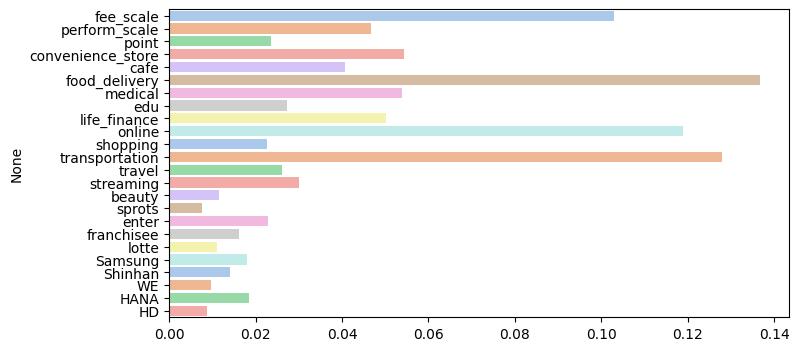

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=X_train.columns, palette=sns.color_palette('pastel'))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
          #     precision    recall  f1-score   support

          #  0       0.74      0.88      0.80       124
          #  1       0.59      0.36      0.45        61

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        96
           1       0.80      0.29      0.43        41

    accuracy                           0.77       137
   macro avg       0.78      0.63      0.64       137
weighted avg       0.77      0.77      0.73       137



Text(70.72222222222221, 0.5, 'True Label')

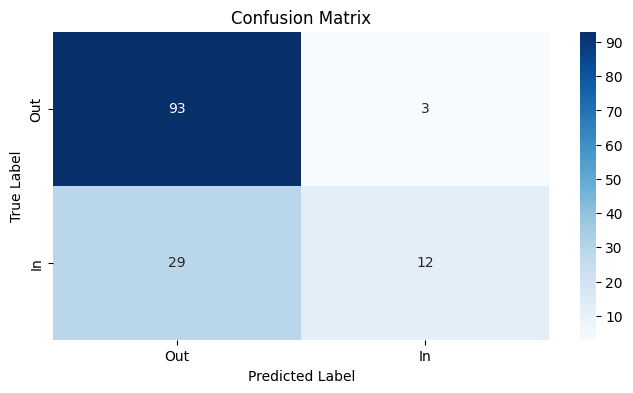

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Out', 'In'], yticklabels=['Out', 'In'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
df_['chart_in'].value_counts()

chart_in
0    479
1    205
Name: count, dtype: int64

### (2-2) XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
set_col = ['fee_scale',
          #  'perform_scale',
          #  'point',
           'convenience_store',
          #  'cafe',
           'food_delivery',
           'medical',
           'edu',
           'life_finance',
           'online',
          #  'shopping',
           'transportation',
           'travel',
           'streaming',
          #  'beauty',
          #  'sprots',
          #  'enter',
           'franchisee',
           'BC', 'IBK', 'KB', 'NH',
           'lotte', 'Samsung', 'Shinhan',
           'WE', 'HANA', 'HD',
           'cluster'
           ]

In [ ]:
X = df_[set_col]
y = df_['chart_in']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((547, 21), (137, 21), (547,), (137,))

In [ ]:
# model = xgb.XGBClassifier(learning_rate=0.5,
#                           n_estimator=30,
#                           random_state=42,
#                           reg_alpha=1,
#                           scale_pos_weight=3)

In [ ]:
model = xgb.XGBClassifier(
                          # colsample_bytree=0.5,
                          # gamma=0.2,
                          learning_rate=0.5,
                          # max_depth=9,
                          # min_child_weight=30,
                          n_estimator=30,
                          random_state=42,
                          reg_alpha=1,
                          scale_pos_weight=3
                          )

In [ ]:
model.fit(X_train, y_train,
          # eval_set=[(x_val, y_val)]
          )

print('Acc:', model.score(X_test, y_test))
# Acc: 0.6108108108108108

Acc: 0.6496350364963503


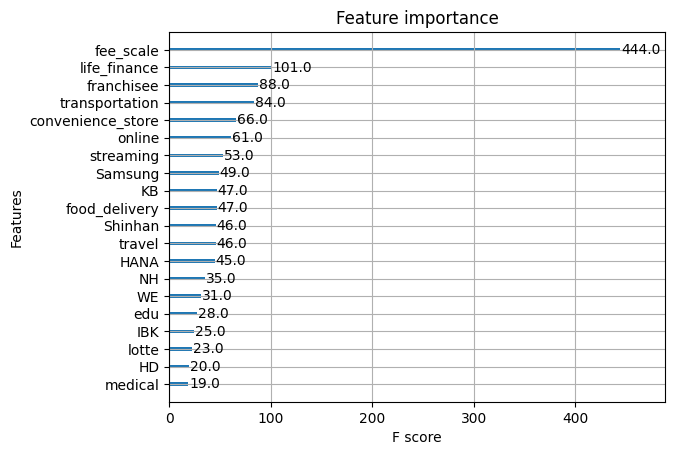

In [ ]:
xgb.plot_importance(model, max_num_features=20)
plt.show()

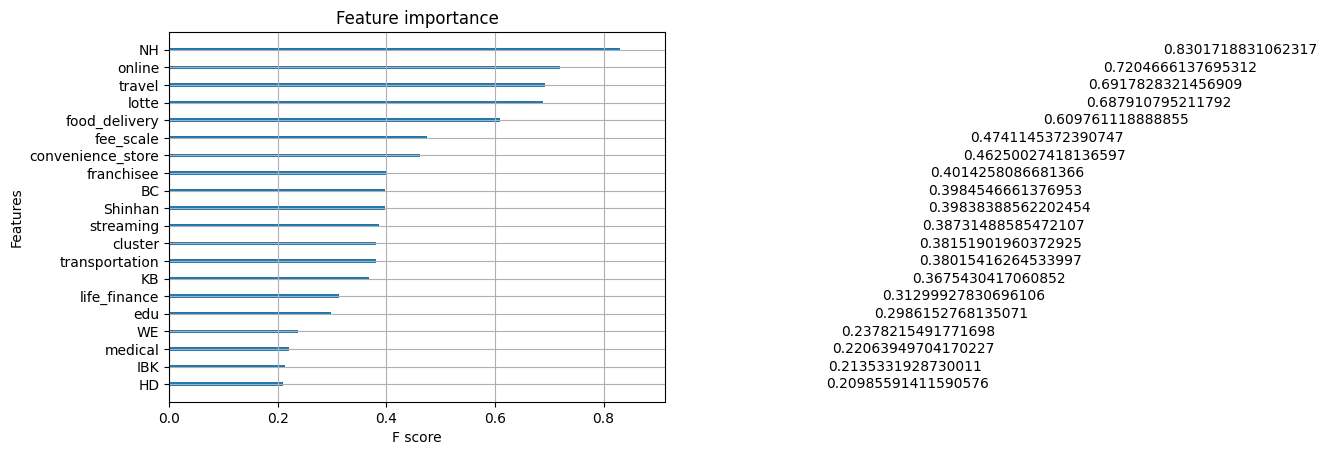

In [ ]:
xgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       124
           1       0.44      0.62      0.51        61

    accuracy                           0.61       185
   macro avg       0.60      0.61      0.59       185
weighted avg       0.66      0.61      0.62       185



Text(70.72222222222221, 0.5, 'True Label')

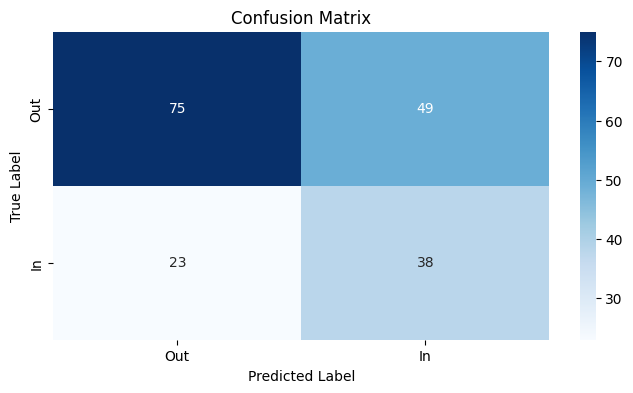

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Out', 'In'], yticklabels=['Out', 'In'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 75  49
# 23  38